# Machine Learning Portfolio 1

|Name|Github|Kaggle|
|----|------|------|
|Henry Lau|HenryLau08|Henry Lau|
|Mohamed Belaachir|mobelaachir|mobelaachir|
|Jayden Debi-Tewari|Jaydendt1|jaydendt123|
|Quincy Soerohardjo|quincysoerohardjo2002|Quincy Soerohardjo|

## Table of Contents
- [Data Overview](#data-overview)
- [Exploratory Data Analysis](#exploratory-data-analysis)
- [Modeling](#modeling)
    - [K-Nearest Neighbours](#k-nearest-neighbors)
    - [Logistic Regression](#logistic-regression)
    - [SVM](#svm)
    - [Decision Tree](#decision-tree)
    - [Ensembles](#ensembles)
        - [Random Forest](#random-forest)
        - [Gradient Boosted Decision Trees](#gradient-boosted-decision-trees)
        - [XGBoost](#xgboost)
    - [Self-Assembled Ensemble](#self-assembled-ensemble)
- [Results](#results)
- [Conclusion & Advice](#conclusion--advice)
- [Sources](#sources)

In [23]:
# Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb


In [24]:
pd.set_option('display.max_columns', None)

train = pd.read_csv('train.csv', index_col='id').sort_index()
test = pd.read_csv('test.csv', index_col='id').sort_index()

## Data Overview

In [25]:
print('Train Data')
display(train.head(10))
print('Test Data')
display(test.head(10))

Train Data


age  hypertension  heart_disease  avg_glucose_level   bmi  gender_Female  \
id                                                                              
1   80.0             0              1              67.45  25.6           True   
7   44.0             0              0             222.75  19.6           True   
8   79.0             0              0              99.23  25.1           True   
9   44.0             0              0             125.44  35.5          False   
10  34.0             0              0              89.11  28.0           True   
20  36.0             0              0              89.79  27.3          False   
22   5.0             0              0             100.81  20.6          False   
23  68.0             0              0              75.91  21.8           True   
24  72.0             0              1             113.65  27.4           True   
29  44.0             1              0             117.10  26.9          False   

    gender_Male  gender_Other  ever_married_No  ever_married_Yes  \
id                                                                 
1         False         False            False              True   
7         False         False            False              True   
8         False         False            False              True   
9          True         False            False              True   
10        False         False            False              True   
20         True         False            False              True   
22         True         False             True             False   
23        False         False            False              True   
24        False         False            False              True   
29         True         False            False              True   

    work_type_Govt_job  work_type_Never_worked  work_type_Private  \
id                                                                  
1                False                   False              False   
7                False                   False               True   
8                False                   False               True   
9                False                   False               True   
10               False                   False               True   
20                True                   False              False   
22               False                   False              False   
23               False                   False               True   
24               False                   False              False   
29               False                   False               True   

    work_type_Self-employed  work_type_children  Residence_type_Rural  \
id                                                                      
1                      True               False                 False   
7                     False               False                 False   
8                     False               False                 False   
9                     False               False                  True   
10                    False               False                 False   
20                    False               False                 False   
22                    False                True                  True   
23                    False               False                  True   
24                     True               False                  True   
29                    False               False                  True   

    Residence_type_Urban  smoking_status_formerly smoked  \
id                                                         
1                   True                           False   
7                   True                           False   
8                   True                           False   
9                  False                           False   
10                  True                           False   
20                  True                           False   
22                 False     

Test Data


age  hypertension  heart_disease  avg_glucose_level   bmi  \
id                                                                
4    37.0             0              0              82.15  24.3   
12   56.0             0              0             102.30  54.9   
14   67.0             0              0             111.04  25.1   
25    4.0             0              0              71.90  14.1   
66   58.0             0              1              96.48  24.0   
71    7.0             0              0              94.41  16.8   
72    3.0             0              0              93.74  17.7   
91   42.0             0              0              98.53  18.5   
113  35.0             0              0              85.59  28.0   
114  47.0             0              0              85.30  22.6   

     gender_Female  gender_Male  gender_Other  ever_married_No  \
id                                                               
4             True        False         False            False   
12            True        False         False            False   
14            True        False         False            False   
25            True        False         False             True   
66            True        False         False            False   
71           False         True         False             True   
72           False         True         False             True   
91            True        False         False             True   
113          False         True         False            False   
114           True        False         False            False   

     ever_married_Yes  work_type_Govt_job  work_type_Never_worked  \
id                                                                  
4                True               False                   False   
12               True               False                   False   
14               True               False                   False   
25              False               False                   False   
66               True               False                   False   
71              False               False                   False   
72              False               False                   False   
91              False               False                   False   
113              True               False                   False   
114              True                True                   False   

     work_type_Private  work_type_Self-employed  work_type_children  \
id                                                                    
4                 True                    False               False   
12                True                    False               False   
14                True                    False               False   
25               False                    False                True   
66                True                    False               False   
71               False                    False                True   
72               False                    False                True   
91                True                    False               False   
113               True                    False               False   
114              False                    False               False   

     Residence_type_Rural  Residence_type_Urban  \
id                                                
4                    True                 False   
12                   True                 False   
14                  False                  True   
25                  False                  True   
66                   True                 False   
71                  False                  True   
72                  False                  True   
91                  False                  True   
113                  True                 False   
114                 False                  True   

     smoking_status_formerly smoked  smoking_status_never smoked  \
id                                           

## Exploratory Data Analysis

**Machine Learning**

De datasets moet voldoen aan de volgende eisen voor het uitvoeren machine learning:

-het moeten numerieke waardes zijn

-het moet geen missende waardes hebben



Onze data is verdeeld in numerieke waardes en booleans. 
Deze booleans kunnen worden omgezet in numerieke waardes. 
Verder zijn er geen missende waardes in de datasets. 


In [26]:
display(train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33550 entries, 1 to 72943
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             33550 non-null  float64
 1   hypertension                    33550 non-null  int64  
 2   heart_disease                   33550 non-null  int64  
 3   avg_glucose_level               33550 non-null  float64
 4   bmi                             33550 non-null  float64
 5   gender_Female                   33550 non-null  bool   
 6   gender_Male                     33550 non-null  bool   
 7   gender_Other                    33550 non-null  bool   
 8   ever_married_No                 33550 non-null  bool   
 9   ever_married_Yes                33550 non-null  bool   
 10  work_type_Govt_job              33550 non-null  bool   
 11  work_type_Never_worked          33550 non-null  bool   
 12  work_type_Private               

None

In [27]:
train[train.select_dtypes('bool').columns] = train[train.select_dtypes('bool').columns].astype(int)

In [28]:
display(train.info(), train.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33550 entries, 1 to 72943
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             33550 non-null  float64
 1   hypertension                    33550 non-null  int64  
 2   heart_disease                   33550 non-null  int64  
 3   avg_glucose_level               33550 non-null  float64
 4   bmi                             33550 non-null  float64
 5   gender_Female                   33550 non-null  int32  
 6   gender_Male                     33550 non-null  int32  
 7   gender_Other                    33550 non-null  int32  
 8   ever_married_No                 33550 non-null  int32  
 9   ever_married_Yes                33550 non-null  int32  
 10  work_type_Govt_job              33550 non-null  int32  
 11  work_type_Never_worked          33550 non-null  int32  
 12  work_type_Private               

None

age  hypertension  heart_disease  avg_glucose_level  \
count  33550.000000  33550.000000   33550.000000       33550.000000   
mean      41.815312      0.088137       0.043040         103.587081   
std       22.477423      0.283498       0.202951          42.127396   
min        0.080000      0.000000       0.000000          55.010000   
25%       24.000000      0.000000       0.000000          77.460000   
50%       43.000000      0.000000       0.000000          91.320000   
75%       59.000000      0.000000       0.000000         111.437500   
max       82.000000      1.000000       1.000000         281.590000   

                bmi  gender_Female   gender_Male  gender_Other  \
count  33550.000000   33550.000000  33550.000000  33550.000000   
mean      28.601216       0.597079      0.402742      0.000179   
std        7.782248       0.490492      0.490457      0.013372   
min       10.100000       0.000000      0.000000      0.000000   
25%       23.300000       0.000000      0.000000      0.000000   
50%       27.700000       1.000000      0.000000      0.000000   
75%       32.800000       1.000000      1.000000      0.000000   
max       97.600000       1.000000      1.000000      1.000000   

       ever_married_No  ever_married_Yes  work_type_Govt_job  \
count     33550.000000      33550.000000        33550.000000   
mean          0.361371          0.638629            0.123875   
std           0.480405          0.480405            0.329444   
min           0.000000          0.000000            0.000000   
25%           0.000000          0.000000            0.000000   
50%           0.000000          1.000000            0.000000   
75%           1.000000          1.000000            0.000000   
max           1.000000          1.000000            1.000000   

       work_type_Never_worked  work_type_Private  work_type_Self-employed  \
count            33550.000000       33550.000000             33550.000000   
mean                 0.004203           0.574635                 0.152787   
std                  0.064693           0.494406                 0.359787   
min                  0.000000           0.000000                 0.000000   
25%                  0.000000           0.000000                 0.000000   
50%                  0.000000           1.000000                 0.000000   
75%                  0.000000           1.000000                 0.000000   
max                  1.000000           1.000000                 1.000000   

       work_type_children  Residence_type_Rural  Residence_type_Urban  \
count        33550.000000          33550.000000          33550.000000   
mean             0.144501              0.499970              0.500030   
std              0.351602              0.500007              0.500007   
min              0.000000              0.000000              0.000000   
25%              0.000000              0.000000              0.000000   
50%              0.000000              0.000000              1.000000   
75%              0.000000              1.000000              1.000000   
max              1.000000              1.000000              1.000000   

       smoking_status_formerly smoked  smoking_status_never smoked  \
count                    33550.000000                 33550.000000   
mean                         0.168733                     0.375618   
std                          0.374522                     0.484289   
min                          0.000000                     0.000000   
25%                          0.000000                     0.000000   
50%                          0.000000                     0.000000   
75%                          0.000000                     1.000000   
max                          1.000000                     1.000000   

       smoking_status_smokes        stroke  
count           33550.000000  33550.000000  
mean                0.148048      0.015410  
std                 0.355153      0.123178  
min                 0.000000      0.00000

**Kolom beschrijving**

age-----------------= leeftijd. (Ratio)

hypertension--------= Hogebloeddruk. 1:JA, 0:Nee (Nominaal)


heart_disease-------= Hartziekte. 1:JA, 0:Nee (Nominaal)


avg_glucose_level---= Gemiddelde glucosegehalte (Ratio)


bmi-----------------= Body mass index (Ratio)


Gender--------------= Male, Female, Other (Nominaal)


Married-------------= Yes, No (Nominaal)


Work type-----------= Government, never worked, self-employed, children(werken met kinderen zoals docent, kinderopvang etc) (Nominaal)


Residence type------= Rural(buiten de stad, dorpen), Urban(in de stad) (Nominaal)


Smoking status------= Formerly smoked(eerder gerookt), never smoked, smokes(actief) (Nominaal)

**relaties**

In [ ]:
train['hypertension'].value_counts()

hypertension
0    30593
1     2957
Name: count, dtype: int64

In [ ]:
train['heart_disease'].value_counts()

heart_disease
0    32106
1     1444
Name: count, dtype: int64

In [ ]:
train['gender_Female'].value_counts()

gender_Female
True     20032
False    13518
Name: count, dtype: int64

In [ ]:
train['gender_Other'].value_counts()

gender_Other
False    33544
True         6
Name: count, dtype: int64

In [ ]:
train['stroke'].value_counts()

stroke
0    33033
1      517
Name: count, dtype: int64

In [ ]:
def fusion(dataframe, mappings):
    """
    General function to map binary columns to a single column.

    Parameters:
    df : pandas DataFrame
        The input DataFrame.
    mappings : list of dict
        Each dict contains:
        - 'cols': list of columns to fuse.
        - 'new_col': the name of the new column to be created.
        - 'map_col': dictionary mapping original columns to final values.
    """
    df = dataframe.copy()
    for mapping in mappings:
        cols = mapping['cols']
        new_col = mapping['new_col']
        map_col = mapping['map_col']
        
        # Ensure columns exist in dataframe
        if not all(col in df.columns for col in cols):
            raise ValueError(f"One or more columns from {cols} not found in DataFrame.")
        
        # Apply the fusion
        df[new_col] = df[cols].idxmax(axis=1)
        df[new_col] = df[new_col].map(map_col)
    
    return df

# List of mappings for your columns
mappings = [
    {
        'cols': ['gender_Female', 'gender_Male', 'gender_Other'],
        'new_col': 'gender',
        'map_col': {'gender_Female': 'Female', 'gender_Male': 'Male', 'gender_Other': 'Other'}
    },
    {
        'cols': ['ever_married_No', 'ever_married_Yes'],
        'new_col': 'ever_married',
        'map_col': {'ever_married_No': 'No', 'ever_married_Yes': 'Yes'}
    },
    {
        'cols': ['work_type_Govt_job', 'work_type_Never_worked','work_type_Private', 'work_type_Self-employed', 'work_type_children'],
        'new_col': 'work_type',
        'map_col': {'work_type_Govt_job': 'govt_job', 
                    'work_type_Never_worked': 'never_worked', 
                    'work_type_Private': 'private', 
                    'work_type_Self-employed': 'self-employed',
                    'work_type_children': 'children'}
    },
    {
        'cols': ['Residence_type_Rural', 'Residence_type_Urban'],
        'new_col': 'residence_type',
        'map_col': {'Residence_type_Rural': 'Rural', 'Residence_type_Urban': 'Urban'}
    },
    {
        'cols': ['smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes'],
        'new_col': 'smoking_status',
        'map_col': {'smoking_status_formerly smoked': 'formerly smoked',
                    'smoking_status_never smoked': 'never smoked',
                    'smoking_status_smokes': 'smokes'}
    }
]

In [ ]:
data = fusion(train, mappings)

In [ ]:
data.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_Female', 'gender_Male', 'gender_Other', 'ever_married_No',
       'ever_married_Yes', 'work_type_Govt_job', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'Residence_type_Rural', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes', 'stroke', 'gender', 'ever_married',
       'work_type', 'residence_type', 'smoking_status'],
      dtype='object')

In [ ]:
data = data[['age','hypertension','heart_disease','avg_glucose_level','bmi','gender','ever_married','work_type','residence_type','smoking_status','stroke']]
data.head(10)

age  hypertension  heart_disease  avg_glucose_level   bmi  gender  \
id                                                                       
1   80.0             0              1              67.45  25.6  Female   
7   44.0             0              0             222.75  19.6  Female   
8   79.0             0              0              99.23  25.1  Female   
9   44.0             0              0             125.44  35.5    Male   
10  34.0             0              0              89.11  28.0  Female   
20  36.0             0              0              89.79  27.3    Male   
22   5.0             0              0             100.81  20.6    Male   
23  68.0             0              0              75.91  21.8  Female   
24  72.0             0              1             113.65  27.4  Female   
29  44.0             1              0             117.10  26.9    Male   

   ever_married      work_type residence_type   smoking_status  stroke  
id                                                                      
1           Yes  self-employed          Urban     never smoked       0  
7           Yes        private          Urban     never smoked       0  
8           Yes        private          Urban  formerly smoked       0  
9           Yes        private          Rural     never smoked       0  
10          Yes        private          Urban     never smoked       0  
20          Yes       govt_job          Urban           smokes       0  
22           No       children          Rural  formerly smoked       0  
23          Yes        private          Rural     never smoked       0  
24          Yes  self-employed          Rural  formerly smoked       0  
29          Yes        private          Rural     never smoked       0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33550 entries, 1 to 72943
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                33550 non-null  float64
 1   hypertension       33550 non-null  int64  
 2   heart_disease      33550 non-null  int64  
 3   avg_glucose_level  33550 non-null  float64
 4   bmi                33550 non-null  float64
 5   gender             33550 non-null  object 
 6   ever_married       33550 non-null  object 
 7   work_type          33550 non-null  object 
 8   residence_type     33550 non-null  object 
 9   smoking_status     33550 non-null  object 
 10  stroke             33550 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 3.1+ MB


In [ ]:
cat_col = data.select_dtypes(include='object').columns
print(cat_col)

Index(['gender', 'ever_married', 'work_type', 'residence_type',
       'smoking_status'],
      dtype='object')


In [ ]:
for col in cat_col:
    fig = px.histogram(data, x=col, color='stroke')
    fig.show()

In [ ]:
for col in cat_col:
    count_series = data[col].value_counts()
    count_df = count_series.reset_index()
    count_df.columns = [col, 'count']
    
    fig = px.pie(count_df, names=col, values='count', title=f'Pie chart of {col}')
    fig.show()

In [ ]:
num_col = data.select_dtypes(exclude=['object','bool']).columns.drop('stroke')

In [ ]:
for col in num_col:
    fig = px.box(data, x=col, color='stroke')
    fig.show()

In [ ]:
data

age  hypertension  heart_disease  avg_glucose_level   bmi  gender  \
id                                                                          
1      80.0             0              1              67.45  25.6  Female   
7      44.0             0              0             222.75  19.6  Female   
8      79.0             0              0              99.23  25.1  Female   
9      44.0             0              0             125.44  35.5    Male   
10     34.0             0              0              89.11  28.0  Female   
...     ...           ...            ...                ...   ...     ...   
72938  40.0             0              0             132.52  40.1  Female   
72939  34.0             0              0              82.72  26.3  Female   
72940   2.0             0              0             102.92  17.6  Female   
72941  68.0             0              0             149.38  27.3    Male   
72943  59.0             0              0              55.29  23.7  Female   

      ever_married      work_type residence_type   smoking_status  stroke  
id                                                                         
1              Yes  self-employed          Urban     never smoked       0  
7              Yes        private          Urban     never smoked       0  
8              Yes        private          Urban  formerly smoked       0  
9              Yes        private          Rural     never smoked       0  
10             Yes        private          Urban     never smoked       0  
...            ...            ...            ...              ...     ...  
72938          Yes        private          Rural     never smoked       0  
72939           No        private          Urban  formerly smoked       0  
72940           No       children          Urban  formerly smoked       0  
72941          Yes  self-employed          Urban  formerly smoked       0  
72943          Yes        private          Urban           smokes       0  

[33550 rows x 11 columns]

**Bevindingen**

## Data Opschonen

In [ ]:
train['ever_married'] = data['ever_married'] # 1 column for ever married Yes or No
train.drop(columns=['ever_married_No','ever_married_Yes'], inplace=True)
train = train.drop(train[(train['stroke'] == 0) & (train['avg_glucose_level'] > 161.57)].index) # removed outliers
train = train.drop(train[(train['stroke'] == 0) & (train['bmi'] > 47.5)].index) # removed outliers
train

age  hypertension  heart_disease  avg_glucose_level   bmi  \
id                                                                  
1      80.0             0              1              67.45  25.6   
8      79.0             0              0              99.23  25.1   
9      44.0             0              0             125.44  35.5   
10     34.0             0              0              89.11  28.0   
20     36.0             0              0              89.79  27.3   
...     ...           ...            ...                ...   ...   
72938  40.0             0              0             132.52  40.1   
72939  34.0             0              0              82.72  26.3   
72940   2.0             0              0             102.92  17.6   
72941  68.0             0              0             149.38  27.3   
72943  59.0             0              0              55.29  23.7   

       gender_Female  gender_Male  gender_Other  work_type_Govt_job  \
id                                                                    
1               True        False         False               False   
8               True        False         False               False   
9              False         True         False               False   
10              True        False         False               False   
20             False         True         False                True   
...              ...          ...           ...                 ...   
72938           True        False         False               False   
72939           True        False         False               False   
72940           True        False         False               False   
72941          False         True         False               False   
72943           True        False         False               False   

       work_type_Never_worked  work_type_Private  work_type_Self-employed  \
id                                                                          
1                       False              False                     True   
8                       False               True                    False   
9                       False               True                    False   
10                      False               True                    False   
20                      False              False                    False   
...                       ...                ...                      ...   
72938                   False               True                    False   
72939                   False               True                    False   
72940                   False              False                    False   
72941                   False              False                     True   
72943                   False               True                    False   

       work_type_children  Residence_type_Rural  Residence_type_Urban  \
id                                                                      
1                   False                 False                  True   
8                   False                 False                  True   
9                   False                  True                 False   
10                  False                 False                  True   
20                  False                 False                  True   
...                   ...                   ...                   ...   
72938               False                  True                 False   
72939               False                 False                  True   
72940                True                 False                  True   
72941               False                 False                  True   
72943               False                 False                  True   

       smoking_status_formerly smoked  smoking_status_never smoked  \
id                                                                   
1                               False                         True   
8                       

In [ ]:
test_data = fusion(test, mappings)
test['ever_married'] = test_data['ever_married']
test.drop(columns=['ever_married_No','ever_married_Yes'], inplace=True)
test

age  hypertension  heart_disease  avg_glucose_level   bmi  \
id                                                                  
32840  52.0             0              0              97.32  21.8   
45158  30.0             0              0             227.99  47.7   
56105  26.0             0              0             113.28  24.4   
3112   24.0             0              0              79.15  21.0   
35224  63.0             0              0              89.69  33.3   
...     ...           ...            ...                ...   ...   
60672  24.0             0              0              77.54  25.0   
25989  17.0             0              0              99.99  22.7   
34072  11.0             0              0              80.11  22.2   
32400  16.0             0              0             105.26  47.5   
53144  52.0             0              1              72.79  54.7   

       gender_Female  gender_Male  gender_Other  work_type_Govt_job  \
id                                                                    
32840           True        False         False               False   
45158           True        False         False               False   
56105           True        False         False               False   
3112            True        False         False               False   
35224           True        False         False               False   
...              ...          ...           ...                 ...   
60672           True        False         False               False   
25989           True        False         False               False   
34072           True        False         False               False   
32400           True        False         False               False   
53144           True        False         False               False   

       work_type_Never_worked  work_type_Private  work_type_Self-employed  \
id                                                                          
32840                   False               True                    False   
45158                   False               True                    False   
56105                   False               True                    False   
3112                    False               True                    False   
35224                   False               True                    False   
...                       ...                ...                      ...   
60672                   False               True                    False   
25989                   False              False                     True   
34072                   False              False                    False   
32400                   False               True                    False   
53144                   False               True                    False   

       work_type_children  Residence_type_Rural  Residence_type_Urban  \
id                                                                      
32840               False                 False                  True   
45158               False                 False                  True   
56105               False                 False                  True   
3112                False                 False                  True   
35224               False                 False                  True   
...                   ...                   ...                   ...   
60672               False                  True                 False   
25989               False                  True                 False   
34072                True                 False                  True   
32400               False                  True                 False   
53144               False                 False                  True   

       smoking_status_formerly smoked  smoking_status_never smoked  \
id                                                                   
32840                           False                        False   
45158                   

In [ ]:
TRAIN = train.copy()
TEST = test.copy()

In [ ]:
cols = TEST.select_dtypes(include=['object','bool']).columns
for col in cols:
    encoder = LabelEncoder()
    TRAIN[col] = encoder.fit_transform(TRAIN[col])
    TEST[col] = encoder.transform(TEST[col])
    print(f'{col} Labels:', encoder.classes_)


gender_Female Labels: [False  True]
gender_Male Labels: [False  True]
gender_Other Labels: [False  True]
work_type_Govt_job Labels: [False  True]
work_type_Never_worked Labels: [False  True]
work_type_Private Labels: [False  True]
work_type_Self-employed Labels: [False  True]
work_type_children Labels: [False  True]
Residence_type_Rural Labels: [False  True]
Residence_type_Urban Labels: [False  True]
smoking_status_formerly smoked Labels: [False  True]
smoking_status_never smoked Labels: [False  True]
smoking_status_smokes Labels: [False  True]
ever_married Labels: ['No' 'Yes']


In [ ]:
float_cols = TEST.select_dtypes('float64').columns
scaler = MinMaxScaler()
TRAIN[float_cols] = scaler.fit_transform(TRAIN[float_cols])
TEST[float_cols] = scaler.transform(TEST[float_cols])

In [ ]:
TRAIN.head(10)

age  hypertension  heart_disease  avg_glucose_level       bmi  \
id                                                                       
1   0.975586             0              1           0.057399  0.333333   
8   0.963379             0              0           0.204033  0.322581   
9   0.536133             0              0           0.324967  0.546237   
10  0.414062             0              0           0.157339  0.384946   
20  0.438477             0              0           0.160476  0.369892   
22  0.060059             0              0           0.211323  0.225806   
23  0.829102             0              0           0.096433  0.251613   
24  0.877930             0              1           0.270567  0.372043   
29  0.536133             1              0           0.286485  0.361290   
36  0.060059             0              0           0.169981  0.139785   

    gender_Female  gender_Male  gender_Other  work_type_Govt_job  \
id                                                                 
1               1            0             0                   0   
8               1            0             0                   0   
9               0            1             0                   0   
10              1            0             0                   0   
20              0            1             0                   1   
22              0            1             0                   0   
23              1            0             0                   0   
24              1            0             0                   0   
29              0            1             0                   0   
36              0            1             0                   0   

    work_type_Never_worked  work_type_Private  work_type_Self-employed  \
id                                                                       
1                        0                  0                        1   
8                        0                  1                        0   
9                        0                  1                        0   
10                       0                  1                        0   
20                       0                  0                        0   
22                       0                  0                        0   
23                       0                  1                        0   
24                       0                  0                        1   
29                       0                  1                        0   
36                       0                  0                        0   

    work_type_children  Residence_type_Rural  Residence_type_Urban  \
id                                                                   
1                    0                     0                     1   
8                    0                     0                     1   
9                    0                     1                     0   
10                   0                     0                     1   
20                   0                     0                     1   
22                   1                     1                     0   
23                   0                     1                     0   
24                   0                     1                     0   
29                   0                     1                     0   
36                   1                     1                     0   

    smoking_status_formerly smoked  smoking_status_never smoked  \
id                                                                
1                                0                            1   
8                                0                            0   
9                                0                            1   
10                               0                            1   
20                               0                            0   
22                               0                            0   
23                               0   

In [ ]:
TEST.head(10)

age  hypertension  heart_disease  avg_glucose_level       bmi  \
id                                                                          
32840  0.633789             0              0           0.195220  0.251613   
45158  0.365234             0              0           0.798136  0.808602   
56105  0.316406             0              0           0.268860  0.307527   
3112   0.291992             0              0           0.111383  0.234409   
35224  0.768066             0              0           0.160015  0.498925   
33344  0.523926             0              1           0.193420  0.419355   
35699  0.194336             0              0           0.125686  0.447312   
48440  0.462891             0              0           0.110229  0.326882   
32256  0.279785             0              0           0.081161  0.453763   
18285  0.072266             0              0           0.186592  0.148387   

       gender_Female  gender_Male  gender_Other  work_type_Govt_job  \
id                                                                    
32840              1            0             0                   0   
45158              1            0             0                   0   
56105              1            0             0                   0   
3112               1            0             0                   0   
35224              1            0             0                   0   
33344              0            1             0                   0   
35699              1            0             0                   0   
48440              1            0             0                   1   
32256              1            0             0                   0   
18285              1            0             0                   0   

       work_type_Never_worked  work_type_Private  work_type_Self-employed  \
id                                                                          
32840                       0                  1                        0   
45158                       0                  1                        0   
56105                       0                  1                        0   
3112                        0                  1                        0   
35224                       0                  1                        0   
33344                       0                  0                        1   
35699                       0                  1                        0   
48440                       0                  0                        0   
32256                       0                  1                        0   
18285                       0                  0                        0   

       work_type_children  Residence_type_Rural  Residence_type_Urban  \
id                                                                      
32840                   0                     0                     1   
45158                   0                     0                     1   
56105                   0                     0                     1   
3112                    0                     0                     1   
35224                   0                     0                     1   
33344                   0                     0                     1   
35699                   0                     1                     0   
48440                   0                     1                     0   
32256                   0                     1                     0   
18285                   1                     1                     0   

       smoking_status_formerly smoked  smoking_status_never smoked  \
id                                                                   
32840                               0                            0   
45158                               0                            0   
56105                               0                            1   
3112                                1                            0   
35224       

## Standaardiseren

## Evaluatie

Wij hebben in deze opdracht te maken met een classificatieprobleem. Hierbij gebruiken wij de volgende metrics om te bepalen hoe goed een model presteert:


Accuracy : voorspeld het aantal correct geclassificeerde voorspellingen.

precision: Hoeveel van de fraudevoorspellingen zijn daadwekelijke fraude.

recall: hoeveel van de daadwerkelijke fraudegevallen heeft het model gevonden.

f1 : geeft een soort gemmiddelde van recall en precision.

In [29]:
#hier maken wij de logistic regression aan en geven wij de uitkomsten van de metrics
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.74      0.77      9910
           1       0.76      0.82      0.79      9910

    accuracy                           0.78     19820
   macro avg       0.78      0.78      0.78     19820
weighted avg       0.78      0.78      0.78     19820



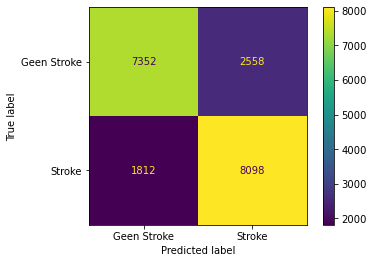

accuracy is 0.7795156407669022
precision is 0.7599474474474475
recall is 0.81715438950555
f1-score is 0.787513371584168


In [33]:
#aanmaken van de confusionmatrix
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Geen Stroke', 'Stroke'])
cmd.plot()  
plt.show()

#de formules om metrics te berekenen met confusionmatrix
TN = cm[0,0]
TP = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]

accuracy = ((TP + TN)/(TP + TN + FP + FN))
precision = TP / (TP + FP) 
recall = TP / (TP + FN) 
f1_score= 2*precision*recall/(precision + recall)

print('accuracy is',accuracy)
print('precision is',precision)
print('recall is',recall)
print('f1-score is',f1_score)

f1-score is voor deze vraagstuk het best maatstaf doordat, Wij hebben bij deze vraagstuk te maken met een imbalanced dataset hierbij is het belangrijk dat wij de nauwkeurigheid van het model goed hebben . Wij vinden dat beide precision en recall even belangrijk zijn. Zodat wij min mogelijk false negatives hebben, want anders verliezen we iemand. En zelfde voor false positives, anders gaat het zoveel mensen zomaar bang maken en naar de hospitaal gaan, alleen om te horen dat ze geen hartaanval hebben en geld hebben verspild. 

## Modeling

### K-Nearest Neighbors

**UITLEG**

### Logistic Regression

**UITLEG**

### SVM

**UITLEG**

### Decision Tree

**UITLEG**

### Ensembles

**UITLEG**

#### Random Forest

#### Gradient Boosted Decision Trees

#### XGBoost

XGBoost (eXtreme Gradient Boosting) is een krachtig machine learning-algoritme dat goed werkt voor zowel regressie als classificatie. Het combineert meerdere eenvoudige modellen (meestal beslisbomen) om samen een sterk en nauwkeurig model te vormen. XGBoost gebruikt gradient boosting om de fouten steeds verder te verkleinen door het model bij elke stap te verbeteren. Daarbij worden ook technieken toegepast om overfitting te voorkomen, zoals L1- en L2-regularisatie.

XGBoost is snel en efficiënt, kan goed omgaan met grote datasets en heeft een ingebouwde manier om ontbrekende gegevens af te handelen. Het is populair vanwege zijn snelheid, nauwkeurigheid en vermogen om ingewikkelde verbanden tussen kenmerken te verwerken.  
[(GeeksforGeeks, 2023)](https://www.geeksforgeeks.org/ml-xgboost-extreme-gradient-boosting/)

### Self-assembled ensemble

Een Voting Classifier is een machine learning-techniek die gebruikmaakt van meerdere modellen om samen een betere en nauwkeurigere voorspelling te maken. Dit is een vorm van ensemble learning, waarbij verschillende basismodellen worden gecombineerd om de prestaties van een model te verbeteren. Het idee hierachter is dat door de voorspellingen van verschillende modellen te combineren, we de bias en variatie kunnen verkleinen en zo de nauwkeurigheid kunnen vergroten.

Er zijn twee soorten voting classifiers:
- Hard Voting: Hierbij wordt de klasse gekozen die het vaakst door de individuele modellen wordt voorspeld. De klasse met de meeste stemmen wordt de uiteindelijke voorspelling.  
- Soft Voting: Hierbij worden de waarschijnlijkheden van elke klasse door de modellen gemiddeld. De klasse met de hoogste gemiddelde waarschijnlijkheid wordt dan als eindvoorspelling gekozen.

In plaats van elk model apart te evalueren, gebruikt de Voting Classifier de gecombineerde kracht van meerdere modellen om een robuustere voorspelling te maken.  
[(GeeksforGeeks, 2023a)](https://www.geeksforgeeks.org/voting-classifier/)

## Results

|Model|f1-score|kaggle score|
|-----|--------|------------|
||||
||||
||||
||||
||||

## Conclusion & Advice

## Sources

[GeeksforGeeks, 2023](https://www.geeksforgeeks.org/ml-xgboost-extreme-gradient-boosting/)  
[GeeksforGeeks, 2023a](https://www.geeksforgeeks.org/voting-classifier/)